ICPE 641 HW 1 - Matt Lee

In [65]:
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target
X_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

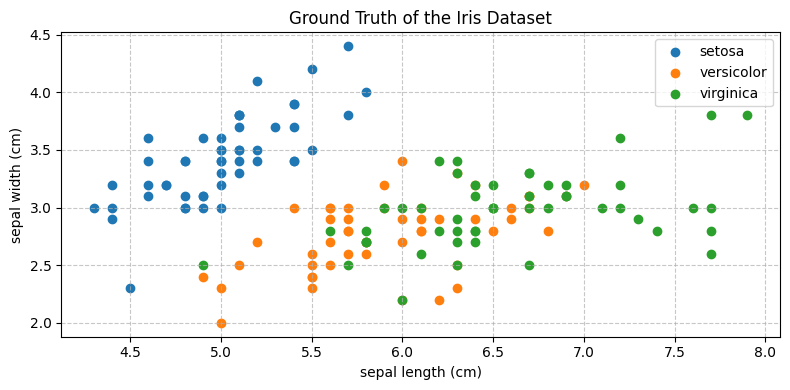

In [66]:
import numpy as np

import matplotlib.pyplot as plt

# Ground truth of the iris dataset with the 3 categories and their corresponding features

feature_names = iris.feature_names

plt.figure(figsize=(8, 4))
target_names = iris.target_names

for i in np.unique(y_iris):
    plt.scatter(X_iris[y_iris == i, 0], X_iris[y_iris == i, 1],
               label=target_names[i])

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Ground Truth of the Iris Dataset')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

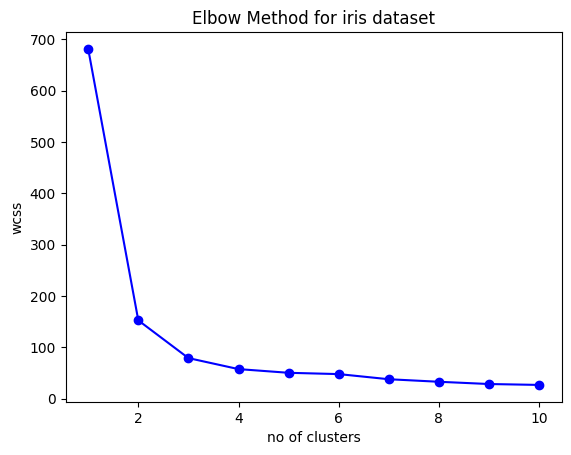

In [67]:
# Find number of clusters using the elbow method
wcss=[]
max_k = 11
for i in range(1, max_k):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)


#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,max_k), wcss, 'bo-')
plt.title('Elbow Method for iris dataset')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


In [68]:
km_iris = KMeans(n_clusters = 3)
km_iris.fit(X_iris)

KMeans(n_clusters=3)

In [69]:
print(y_iris)
print(km_iris.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


K-means to true label mapping: {1: 0, 2: 1, 0: 2}


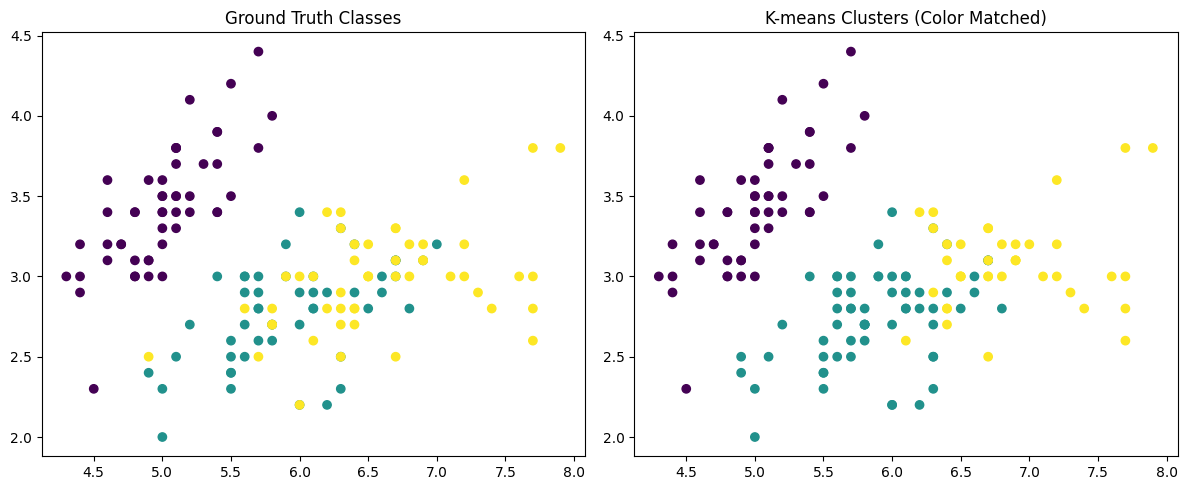

In [70]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Matching K-means Labels to Ground Truth, using confusion_matrix for consistent visualization
conf_mat = confusion_matrix(y_iris, km_iris.labels_)
km_to_true_mapping = {}
for i in range(len(conf_mat)):
    km_label = np.argmax(conf_mat[i])
    km_to_true_mapping[km_label] = i

print("K-means to true label mapping:", km_to_true_mapping)

# Create new color-matched K-means labels
matched_labels = np.array([km_to_true_mapping.get(label, -1) for label in km_iris.labels_])

# Plot with consistent colors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis')
plt.title('Ground Truth Classes')

plt.subplot(1, 2, 2)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=matched_labels, cmap='viridis')
plt.title('K-means Clusters (Color Matched)')

plt.tight_layout()
plt.show()

In [71]:
# Using DBSCAN clustering method
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5

# Compute DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_iris)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [72]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 17


In [73]:
print(labels)
print(set(labels))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
{0, 1, -1}


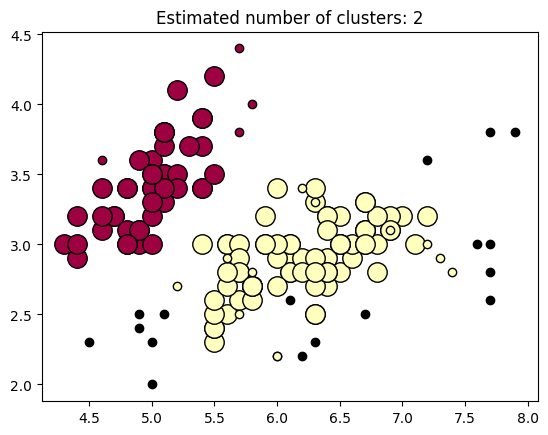

In [74]:
## Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_iris[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_iris[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [75]:
from sklearn.metrics import adjusted_rand_score

# Calculate the Adjusted Rand Index score between ground truth and K-means clustering
ari_score = adjusted_rand_score(y_iris, km_iris.labels_)

print(f"Adjusted Rand Index score for K-means clustering: {ari_score:.4f}")

# For comparison, also calculate the score for DBSCAN clustering
ari_score_dbscan = adjusted_rand_score(y_iris, labels)

print(f"Adjusted Rand Index score for DBSCAN clustering: {ari_score_dbscan:.4f}")

Adjusted Rand Index score for K-means clustering: 0.7163
Adjusted Rand Index score for DBSCAN clustering: 0.5206


In [76]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Calculate homogeneity and completeness scores for KMeans
kmeans_homogeneity = homogeneity_score(y_iris, km_iris.labels_)
kmeans_completeness = completeness_score(y_iris, km_iris.labels_)
kmeans_v_measure = v_measure_score(y_iris, km_iris.labels_)

print(f"KMeans Clustering Metrics:")
print(f"Homogeneity: {kmeans_homogeneity:.4f}")
print(f"Completeness: {kmeans_completeness:.4f}")
print(f"V-measure: {kmeans_v_measure:.4f}")
print("-" * 50)

# Calculate homogeneity and completeness scores for DBSCAN
dbscan_homogeneity = homogeneity_score(y_iris, labels)
dbscan_completeness = completeness_score(y_iris, labels)
dbscan_v_measure = v_measure_score(y_iris, labels)

print(f"DBSCAN Clustering Metrics:")
print(f"Homogeneity: {dbscan_homogeneity:.4f}")
print(f"Completeness: {dbscan_completeness:.4f}")
print(f"V-measure: {dbscan_v_measure:.4f}")
print(f"Noise points: {n_noise_} out of {len(y_iris)} samples")

KMeans Clustering Metrics:
Homogeneity: 0.7364
Completeness: 0.7475
V-measure: 0.7419
--------------------------------------------------
DBSCAN Clustering Metrics:
Homogeneity: 0.5599
Completeness: 0.6566
V-measure: 0.6044
Noise points: 17 out of 150 samples


We can see from the performance scores above (rand index, homogeneity, completeness) that the k-means clustering method works much better than DB scan.  This is because the k-means algorithms scores closer to 1.0 on each metric (which is better).  It's also apparent from the plots that DBSCAN is not capturing all of the clusters in the iris data (2 clusters vs 3 in the ground truth).  There is also not clear separation between two of the classes (versicolor, viginica) which DBSCAN does not do as well with (it struggles with clusters that have non-uniform density, and overlap).